# Capstone Project - The Battle of Neighborhoods (Week 2)

#### Table of Content:
1. Introduction/Business Problem 
2. Data
3. Methodology 
4. Results and Discussion
6. Conclusion

#### 1. Introduction/Business Problem

Chicago has often been in national headlines for fluctuations in violent crime. The south side of Chicago is notoriously known for being riddled with high violent crime rates. In particular, Chicago was in the nation's spotlight in 2016 for raising the nation’s crime rate overall because of the large uptick in crimes from 2015 to 2016. There is a speculation that the significant jump in violent crime circled around the case involving Laquan Mcdonald and the subsequent release of the video that recorded the incident. 

By analyzing the data, I am interested in finding out any possible correlation between certain key variables that lead to predictive behaviors. Criminology theories suggest that certain types of sociological parameters such as income or presence of authority can play a role to determine and predispose people to commit crimes. In addition, I will visualize and confirm the uptick in crime rate and where/when crime is happening in Chicago.

#### 2. Data

I used the Chicago crime dataset from Kaggle spanning from 2012 - 2017. The data included information such as date/time when the crime happened, block where the crime occurred, type of crime, location description, whether there was an arrest, and location coordinates.

I removed data from 2017 as this data was not complete for the whole year so in any year over year analysis, this would have made for an inaccurate comparison. Some additional columns I added were for the type of charge (felony or misdemeanor) the crime fell under in Chicago, general location buckets based off the location description, and also some parts of date and time parsed out in order to view the data by different aspects of time such as year, month, hour, etc.

In addition, I generated the heatmap that visualizes density of crime in different areas filtering by charge (misdemeanor or felony), location, and year range for analysis.

#### 3. Methodology

In this project, I used python’s framework to analyze the data. The different frameworks and packages are installed below. I extracted the data into Pandas dataframe and applied the format to set time as hour, month, and year. I also excluded the data in 2017 because it was only available for one month. 

Then, I analyzed the general trend of the crime data from 2012 to 2016. To reduce a processing time, I used a resampling time-series method by months for the number of crimes. The resampling method in pandas is similar to the groupby method for a certain time span.

In [2]:
#import data and python packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3592e1e92c664acea14ff7de8507716d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='foUAsLAHXFP-2Z3H7JzDBvEo6b-K6GunD1U6Cq1LPzJn',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3592e1e92c664acea14ff7de8507716d.get_object(Bucket='capstoneproject-donotdelete-pr-zrqnj2qqw9pabi',Key='Chicago_Crimes_2012_to_2017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)

In [29]:
#convert dates to datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

#set the indext
df.index = pd.DatetimeIndex(df.Date)

#add time_hour
df['time_hour'] = df['Date'].apply(lambda x : x.hour)
df['month'] = df['Date'].apply(lambda x : x.month)
df['year'] = df['Date'].apply(lambda x : x.year)

#remove data in 2017 because it only contains 1 month of data
df = df[df['year']!= 2017]

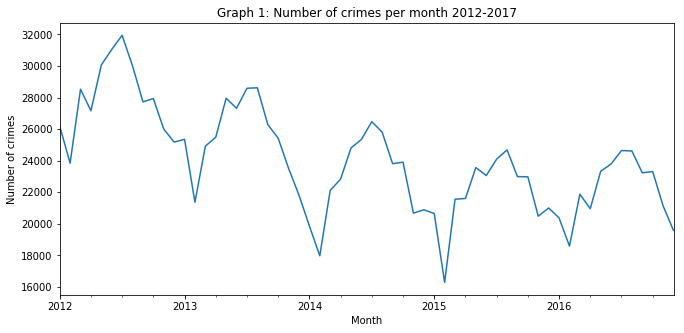

In [6]:
plt.figure(figsize=(11, 5))

#resample time series by months
df.resample('M').size().plot(legend=False)
plt.title('Graph 1: Number of crimes per month 2012-2017')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.show()

In Graph 1, it is shown that the frequency of crimes in Chicago is decreasing, with seasonal peaks between June to August and drops between January to March.

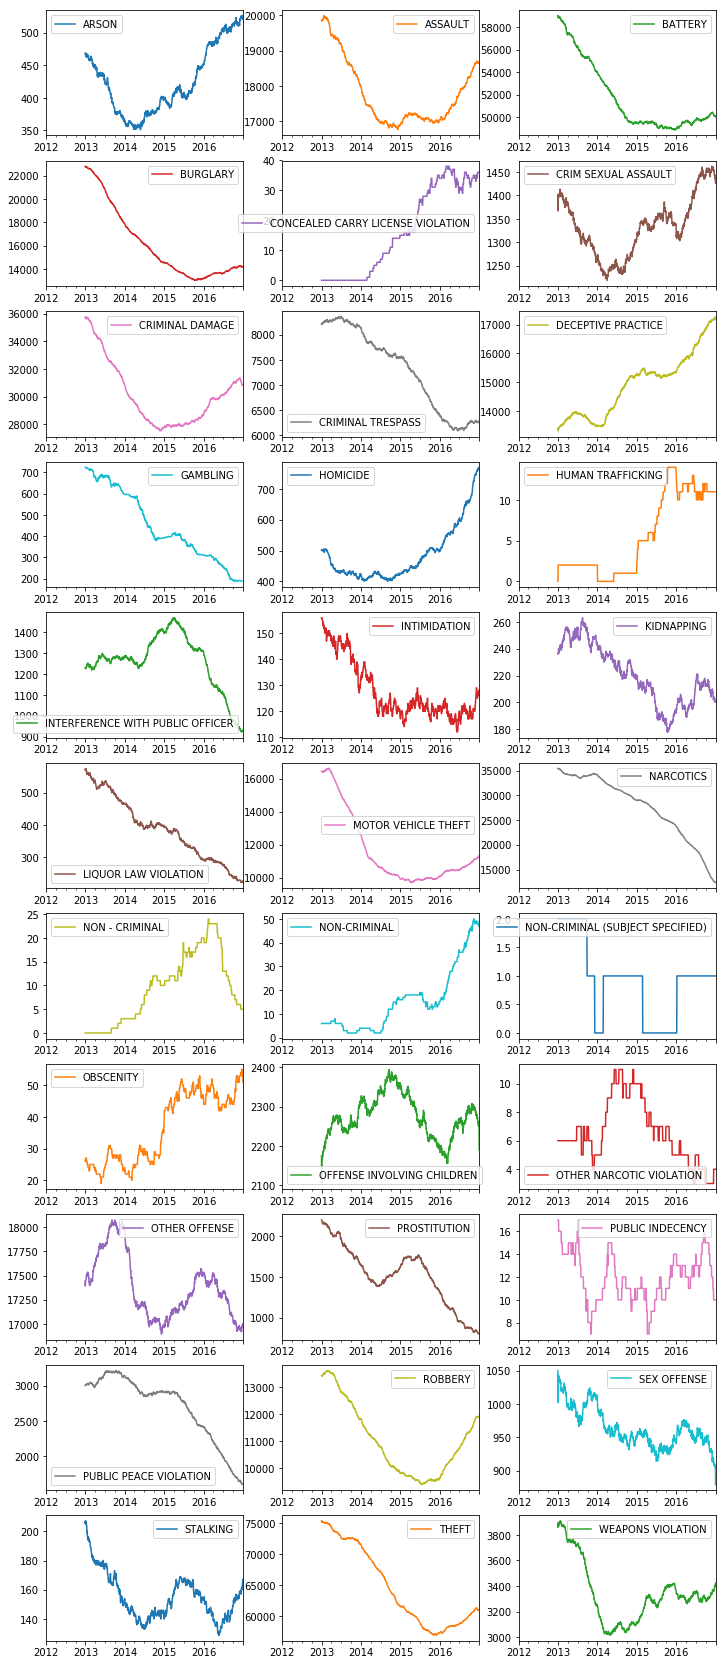

In [7]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type',
                                  index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True,
                                                layout=(-1, 3), sharex=False, sharey=False)

In the graph of the trend frequency for each kind of crime, it is shown that despite the decrease in the general trend of crimes, the following crimes have an increasing trend: Arson, Concealed Carry, Sexual Assault, Obscenity, Deceptive Practice, Homicide, Non-criminal, Robbery, Theft, Weapons Violation, Criminal Damage, Motor Vehicle Theft, Human Trafficking, and Stalking.

From the data above, I would like to focus on the high-frequency crimes with a rising trend such as Ignoring Stalking, Obscenity, Human Trafficking, and Non-criminal offenses. I first filtered the dataset of crimes, grouped them by the hour of the day, and subsequently plotted them based on the frequency of occurrence.

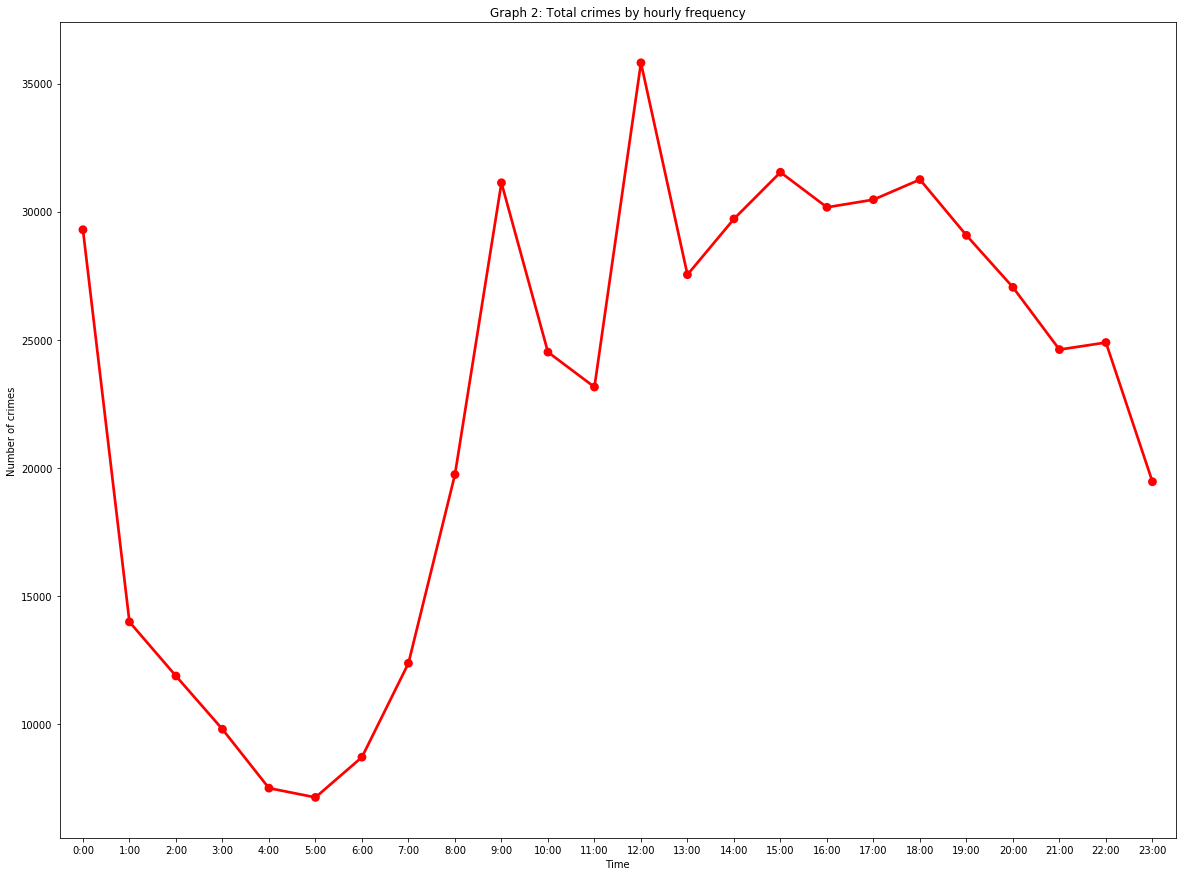

In [8]:
#identify overall crime trend by hourly periods
crimes_by_time = df.copy()

#define the top 10 crime types
primary_types = ('ARSON','CONCEALED CARRY LICENSE VIOLATION','CRIME SEXUAL ASSAULT',
                'DECEPTIVE PRACTICE','HOMICIDE','ROBBERY','THEFT','WEAPONS VIOLATION',
                'MOTOR VEHICLE THEFT','CRIMIAL DAMAGE')

#filter out rows with the top 10 crime types
crimes_by_time = crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]

#group crimes by time hour
crimes_by_time = crimes_by_time.groupby('time_hour').size().reset_index(name='Number of crimes')
crimes_by_time['hours'] = crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')

#plot crimes by time period
fig = plt.figure(figsize=(20, 15))
sns.pointplot(data=crimes_by_time, x='hours', y='Number of crimes', color='red')
plt.xlabel('Time')
plt.ylabel('Number of crimes')
plt.title('Graph 2: Total crimes by hourly frequency')
plt.show()

In Graph 2, it is shown that crime happens mostly during daytime and dips in the early morning. It would probably be better to do a comparison of the ratio of people who are awake and people who are committing the crime. The ratio is expected be higher in the early morning; however, I do not have enough data to prove this assumption.

Nevertheless, it mentions the specific time period when citizens and policemen need to be more careful throughout the day. I can also further narrow down each crime based on crime type.

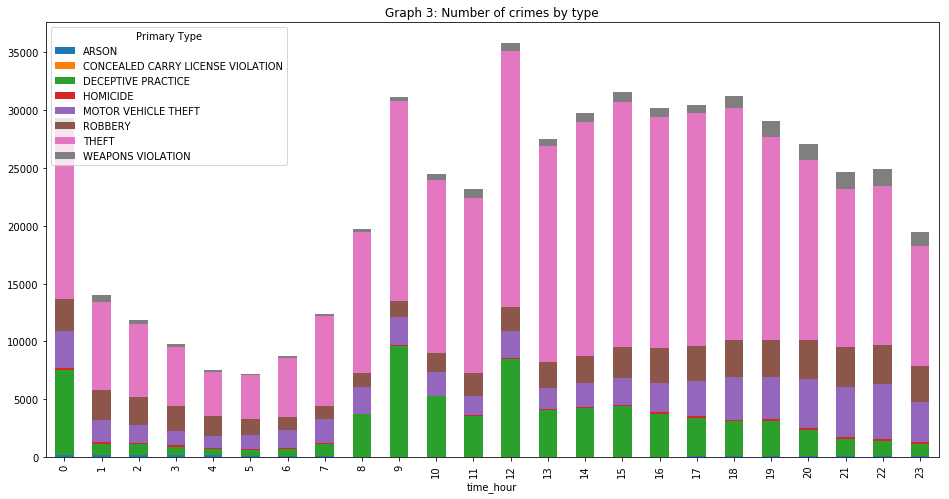

In [9]:
#group crimes by crime types
crimes_by_type = df.copy()
crimes_by_type = crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type = crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='Number of crimes')

#formate hour data
crimes_by_type['hours'] = crimes_by_type['time_hour'].apply(lambda x: str(x)+':00')

#create a pivot table of crime types
crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['time_hour'], columns=['Primary Type'],
                                     values='Number of crimes', aggfunc=np.sum)

#create stacked bar chart of crime types by hourly period
crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), title='Graph 3: Number of crimes by type')

Looking at the trends across the time periods in graph 3, each crime type seems to have similar proportions within every hour. Theft and Criminal Damage form a significant portion of crimes committed. Deceptive practices happen more often during day-time, perhaps being linked to white-collar crimes with arrests that happen during office hours.

Then, I am going to analyze the trend for monthly crimes by grouping the same data by month and plot a heatmap based on top crime description and months.

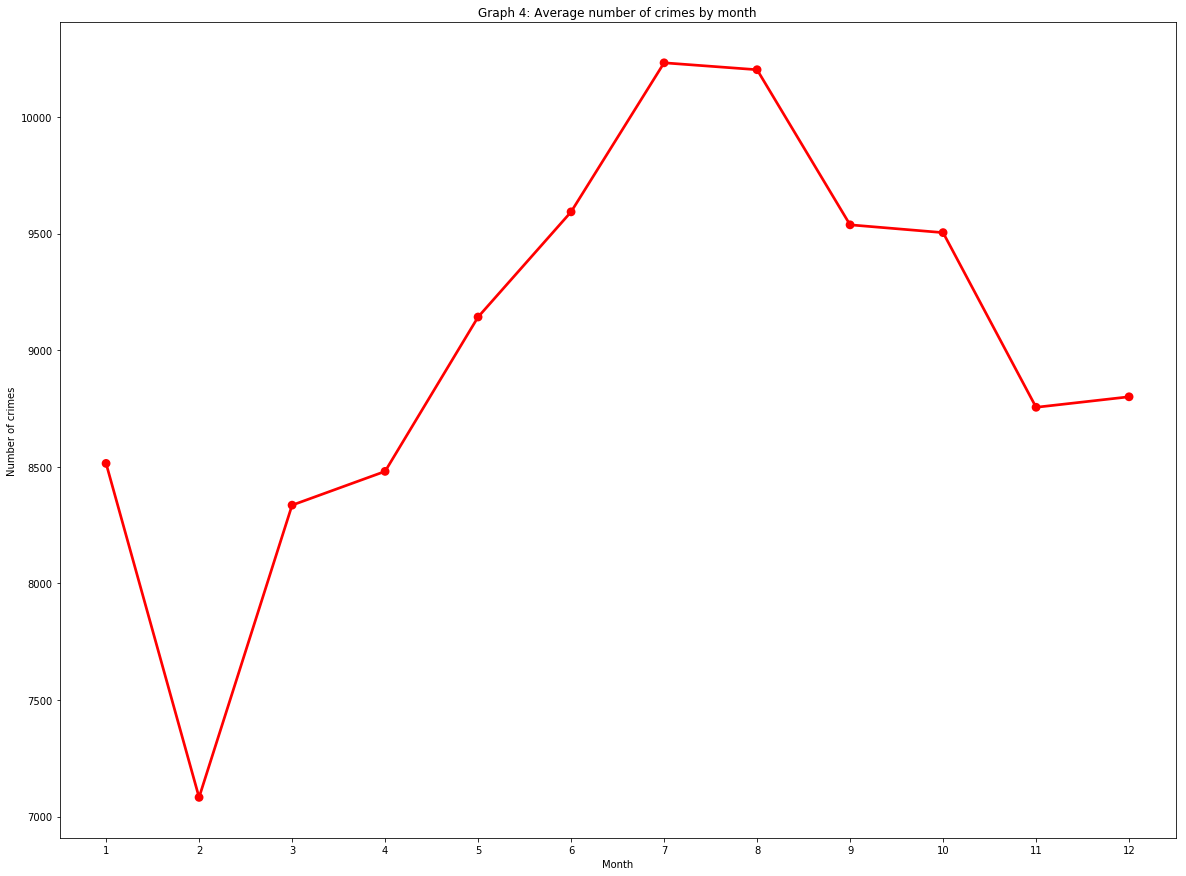

In [10]:
#identify overall crime trend by monthly periods
crimes_by_month = df.copy()
crimes_by_month = crimes_by_month[crimes_by_month['Primary Type'].isin(primary_types)]
crimes_by_month = crimes_by_month.groupby('month').size().reset_index(name='Number of crimes')

#calculate the average crime count by dividing each monthly total crimes by 5 (years)
crimes_by_month['month_average)'] = crimes_by_month['Number of crimes'].apply(lambda x: x/5)

#plot crimes by time period
fig = plt.figure(figsize=(20, 15))
sns.pointplot(data=crimes_by_month, x='month', y='month_average)', color='red')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Graph 4: Average number of crimes by month')
plt.show()

According to the monthly crime rates in graph 4, it is stated that crimes dip in February and spike in July. For tourists, this could be useful for travel information, and for the police department, the data suggests which months to be on high alert.

Using the same data of high-frequency crimes with rising trends, I analyzed the proportion of arrest for each crime. In particular, I grouped the data by crime type and arrest, then I retrieved the ratio between true and false arrest.

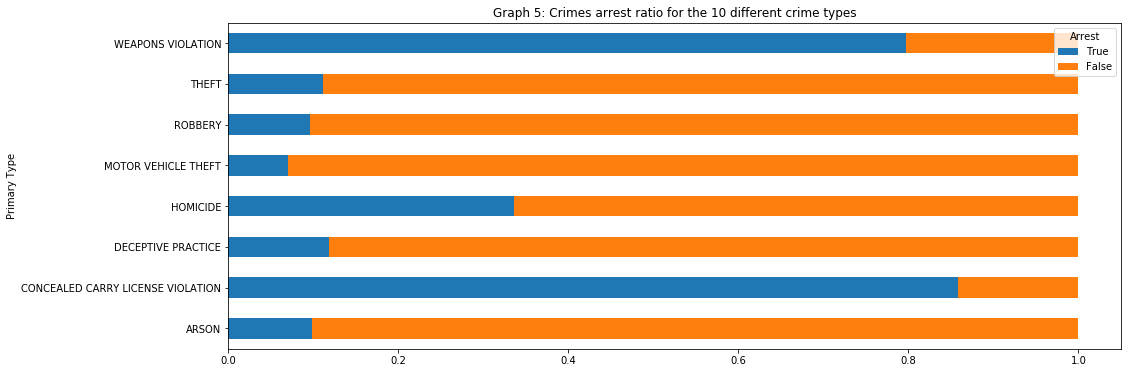

In [28]:
#group by Primary Type and Arres
crimes_by_arrest = df.copy()
crimes_by_arrest = crimes_by_arrest.groupby(['Primary Type','Arrest']).size().reset_index(name='Number of crimes')

#determine the top 10 crime primary types
crimes_by_arrest = crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_types)]

#create a pivot table
crimes_by_arrest_pivot = pd.pivot_table(crimes_by_arrest, index=['Primary Type'],
                                       columns=['Arrest'], values='Number of crimes', aggfunc=np.sum)
crimes_by_arrest_pivot = crimes_by_arrest_pivot.reset_index()

#create new columns in the pivot table
crimes_by_arrest_pivot['Total number'] = crimes_by_arrest_pivot[True] + crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True'] = crimes_by_arrest_pivot[True]/crimes_by_arrest_pivot['Total number']
crimes_by_arrest_pivot['False'] = crimes_by_arrest_pivot[False]/crimes_by_arrest_pivot['Total number']
crimes_by_arrest_pivot = crimes_by_arrest_pivot[['Primary Type', 'True', 'False']]
crimes_by_arrest_pivot = crimes_by_arrest_pivot.set_index('Primary Type')

#plot the bar chart
crimes_by_arrest_pivot.plot(kind='barh', stacked=True, figsize=(16, 6), title='Graph 5: Crimes arrest ratio for the 10 different crime types')

In Graph 5, it shows us that crimes involving “Weapons Violation” & “Concealed Carry License Violation” have a high arrest count. However, for the other crime types, the Chicago police department might want to look into better ways of tackling investigations. There is also a possibility of false reports and allegations.

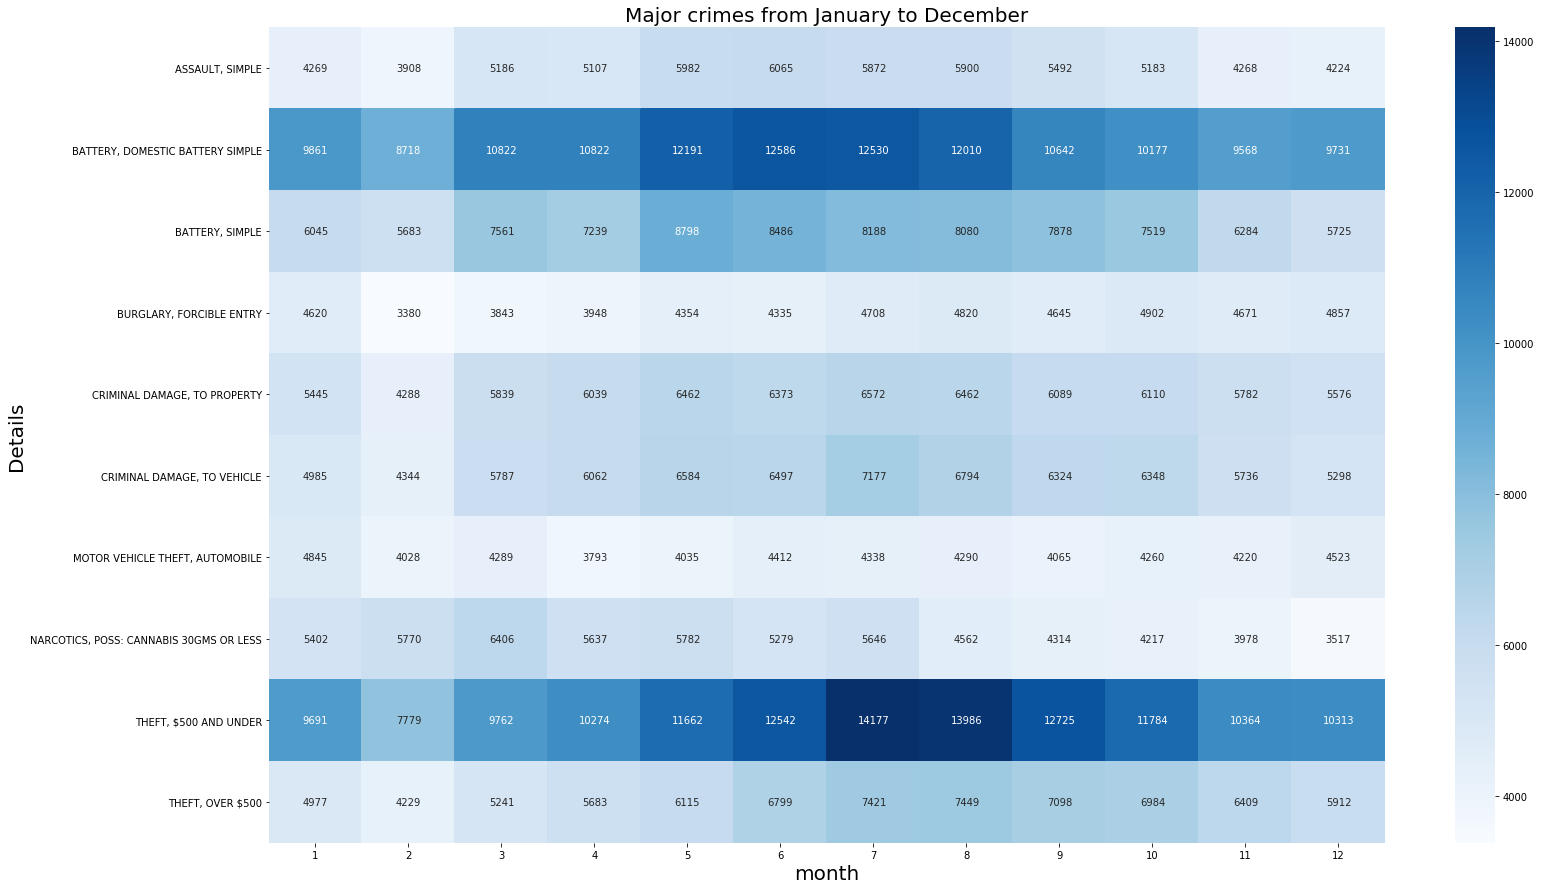

In [26]:
#combine Primary Type and Description 
df['Details'] = df['Primary Type'] + ', ' + df['Description']

#group by crime details and show top 10 crimes with the highest arrest rates
top_crimes = df.groupby(['Details'])['Arrest'].count()
top_crimes = pd.DataFrame(top_crimes).nlargest(10,'Arrest').reset_index()
top_crimes = list(top_crimes['Details'])
top_crimes

df1 = df.groupby(['Details','month'])['Arrest'].count()

#format chart
DIMS = (25, 15)
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
ax1.set_title('Major crimes from January to December', fontsize=20)
ax1.set_ylabel('Details', fontsize=20)
ax1.set_xlabel('Month', fontsize=20)

#define the top 20 crime types
df1 = pd.DataFrame(df1).reset_index()
df1 = df1[df1['Details'].isin(top_crimes)]

#pivot data to 2D table and fill all N/A values
df1 = df1.pivot_table(index='Details', columns='month', values='Arrest')
df1.fillna(0, inplace=True)

#create heatmap
sns.heatmap(df1, cmap='Blues', annot=True, fmt='g')

From the heatmap, it is mentioned that theft under $500, domestic and simple battery are the most frequently occurring crimes in Chicago based on arrest counts. Each of these crimes has slightly different peak months, but they are all within the summer months.

#### 4. Results and Discussion

A similar trend we notice across our analysis shows that crime rates spike from July to August during the summer period. Some researchers reason that increased temperatures from the increased daylight hours can lengthen the amount of time people spend away from their homes. It leads to the increase in the number of people in public and the amount of time that homes are left empty which creates a greater possibility of criminal activities.

Others point to the effect of students on summer vacation, who are otherwise occupied with schooling during other seasons; whereas others postulate that heat-induced discomfort could also make people more aggressive and more likely to act out.

Numerous studies have shown that rates of criminal behavior among teens and young adults drop when their communities provide them with other ways to spend their time and earn money. This was found to be true in Los Angeles during several time periods, where gang activity in poor communities was reduced when community centres were opened for teens. Similarly, a 2013 study conducted by the University of Chicago Crime Lab found that participation in a summer job program slashed the arrest rate for violent crimes by more than half among teens and young adults who were at a high risk for committing crime.

Taking these facts into consideration, it seems clear that the problem is not about more people being outside during the summer months, but about they being outside in unequal societies that are not providing for their needs. Crime might spike at a time when a greater amount of people being in public together simultaneously, and leaving their homes unattended, but that is not why crime exists.

Crime rates are falling over the year and police attributes the drop to putting more officers on the streets and investing in new technology and a smarter policing strategy.

“Chicago Police Department now has data-driven command hubs known as Strategic Decision Support Centres in 12 of the department’s 22 districts. The centers link gunshot detection sensors and video to a system that can rapidly alert cops in the field to a shooting and identify potential suspects. The centers, operated by police and civilians from the University of Chicago Crime Lab, employ a predictive computer program called HunchLab to look at data such as crime incidents and proximity to liquor stores and gas stations. The software anticipates hot spots and suggests the deployment of officers to prevent retaliatory shootings.”

Of course, this is not to mean all crime types have seen falling crime rates. Some crimes such as stalking, theft and sexual assault still have a rising trend. The Chicago Police Department needs to be aware of these incidents and take appropriate actions.

#### 5. Conclusion

We believe this data analytic project give us a scientific view about the security status and crime rate of the Chicago city. According to the analysis result and visualization, we can view the most frequently occurring crimes and the frequent occurring months where crimes happened. We alsospecifically looked into certain crime types to view how they have changed over the years, such as theft, homicide, and sexual crimes. Even though there were a lot of reported crimes in Chicago each year, the arrest rate was not even as high as 50% for each year letting us believe that Chicago’s police arrest or investigation methods were not effective enough. We believe if our data analytics can give us all these information about the security status of the Chicago city, a bigger data analytics project will provide much more valuable information which can be used as a powerful source for taking wise actions that increases the security status of our cities.